In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
mdc = pd.read_csv('report-genus.tsv', sep='\t').T
mdc.drop(['Numero da amostra','Nome da amostra','TOTAL', 'Local-Etapa'],inplace=True)
mdc.reset_index(level=0, inplace=True)
mdc.head()

,index,0,1
0,Acetoanaerobium,18,6
1,Achromobacter,218,47
2,Acidovorax,1,22
3,Acinetobacter,145,0
4,Aeromicrobium,0,2


## Anode

In [3]:
mdc_anod = mdc.copy().drop(mdc.columns[[2]], axis=1)
new_df = mdc_anod[mdc_anod[0] > 160]
new_df.loc[len(new_df)] = ["Others", mdc_anod[mdc_anod[0] <= 160][0].sum()]
new_df

/home/mone/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,0
1,Achromobacter,218
9,Alcaligenes,997
10,Alcanivorax,238
17,Aquamicrobium,963
19,Others,1565
32,Brevundimonas,527
41,Delftia,458
44,Desulfomicrobium,1268
46,Devosia,483
64,Halothiobacillus,348


In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 131
Data columns (total 2 columns):
index    19 non-null object
0        19 non-null object
dtypes: object(2)
memory usage: 1.1+ KB


In [5]:
new_df_2=np.array(new_df)
new_df_2

array([['Achromobacter', 218],
       ['Alcaligenes', 997],
       ['Alcanivorax', 238],
       ['Aquamicrobium', 963],
       ['Others', 1565],
       ['Brevundimonas', 527],
       ['Delftia', 458],
       ['Desulfomicrobium', 1268],
       ['Devosia', 483],
       ['Halothiobacillus', 348],
       ['Macellibacteroides', 289],
       ['Mesotoga', 431],
       ['Methanosarcina', 361],
       ['Paracoccus', 2531],
       ['Pseudochrobactrum', 477],
       ['Pseudomonas', 252],
       ['Rhizobium', 1124],
       ['Stappia', 1414],
       ['Thauera', 496]], dtype=object)

In [6]:
order = []
anode = []
for item in new_df_2:
    order.append(item[0])
    anode.append(item[1])   

In [7]:
type(order), type(anode)

(list, list)

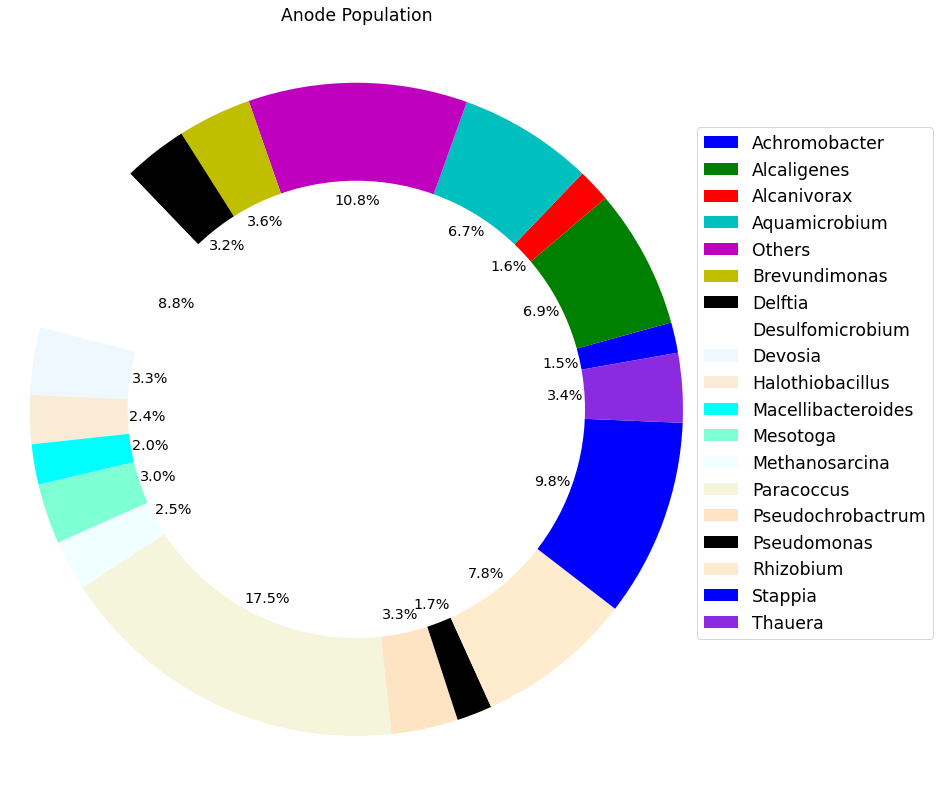

In [8]:
from __future__ import division
from matplotlib import colors as mcolors
labels = order[0:33]
sizes = anode[0:33]
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig1, ax1 = plt.subplots(figsize=(10,11))
patches, texts, autotexts = ax1.pie(sizes, colors=colors,autopct='%1.1f%%',
        labeldistance=1.04, pctdistance=0.64, shadow=False, startangle=10)

for t in texts:
    t.set_size('xx-large')
for t in autotexts:
    t.set_size('x-large')
    autotexts[0].set_color('k')

centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
#plt.title('Diversidade')
plt.legend(labels, bbox_to_anchor=(0.975,0.88),fontsize='xx-large', loc="upper left")
plt.title('Anode Population', fontsize='xx-large')
plt.savefig('genero_anode.png', dpi = 400)
plt.show()

## Cathode

In [9]:
mdc_cathod = mdc.copy().drop(mdc.columns[[1]], axis=1)
new_df2 = mdc_cathod[mdc_cathod[1] > 160]
new_df2.loc[len(new_df2)] = ["Others", mdc_cathod[mdc_cathod[1] <= 160][1].sum()]
new_df2

/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,1
11,Alicycliphilus,599
24,Bacillus,1044
93,Nitrosomonas,7576
98,Paracoccus,30542
107,Pseudomonas,333
5,Others,1610


In [10]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 11 to 5
Data columns (total 2 columns):
index    6 non-null object
1        6 non-null object
dtypes: object(2)
memory usage: 144.0+ bytes


In [11]:
new_df_3=np.array(new_df2)
new_df_3

array([['Alicycliphilus', 599],
       ['Bacillus', 1044],
       ['Nitrosomonas', 7576],
       ['Paracoccus', 30542],
       ['Pseudomonas', 333],
       ['Others', 1610]], dtype=object)

In [12]:
order2 = []
cathode = []
for item in new_df_3:
    order2.append(item[0])    
    cathode.append(item[1])

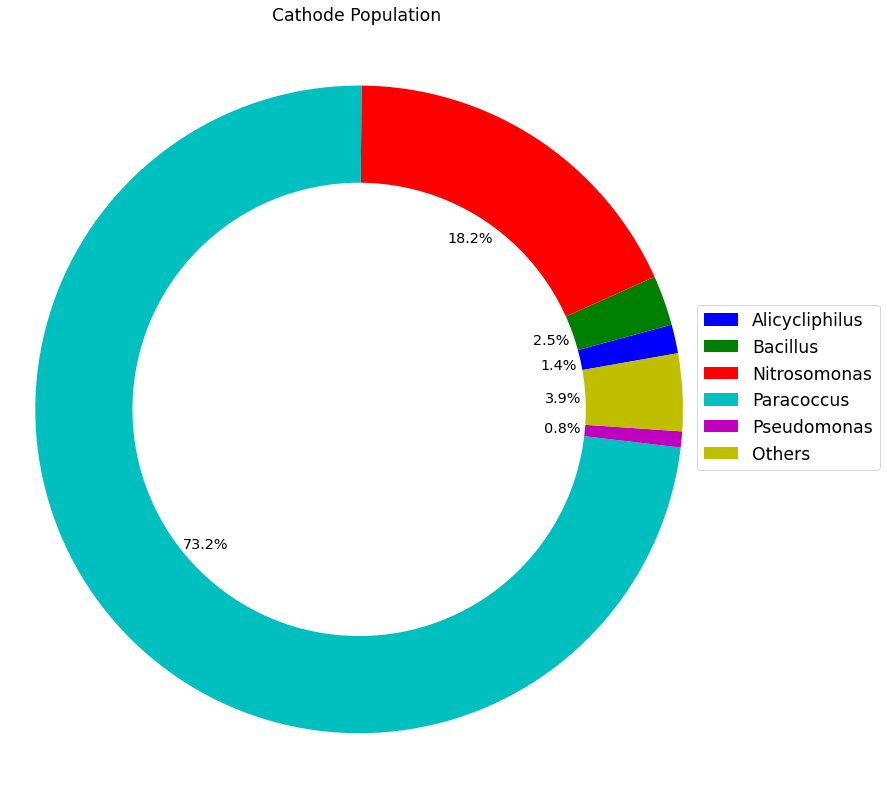

In [14]:
from __future__ import division
from matplotlib import colors as mcolors
labels = order2[0:70]
sizes = cathode[0:10]
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig1, ax1 = plt.subplots(figsize=(10,11))
patches, texts, autotexts = ax1.pie(sizes,colors=colors,autopct='%1.1f%%',
        labeldistance=1.03, pctdistance=0.63, shadow=False, startangle=10)
for t in texts:
    t.set_size('xx-large')
for t in autotexts:
    t.set_size('x-large')
    autotexts[0].set_color('k')
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Cathode Population', fontsize='xx-large')
plt.legend(labels, bbox_to_anchor=(0.975,0.65),fontsize='xx-large', loc="upper left")
plt.savefig('filo_cathode.png', dpi = 400)
plt.show()